<a href="https://colab.research.google.com/github/Nataliatp23/Airbnb_RJ/blob/main/Natalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook airbnb RJ 


Análise Descritiva

In [96]:
# Carregando os pacotes do Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 18
sns.set_context('talk', font_scale=1.2);
%matplotlib inline
import seaborn as sns
import missingno as msno  

# configurar as visualizações
sns.set_style('darkgrid')
sns.set_palette('Accent')


In [97]:
# Carregando o dataset com informações da plataforma Airbnb no RJ.
import csv
arquivo = open('listings.csv')
linhas = csv.reader(arquivo)
for linha in linhas:
    print(linha)

A saída de streaming foi truncada nas últimas 5000 linhas.
['15086540', 'Recreio com amor e aconchego', '94864529', 'Luiz', '', 'Recreio dos Bandeirantes', '-23.02223', '-43.45977', 'Entire home/apt', '990', '2', '1', '2018-11-05', '0.04', '1', '358']
['15090610', '3 Bedroom 2 Bath - 5 min. to beach Copacabana #502', '132230', 'Pierre', '', 'Copacabana', '-22.97273', '-43.18953', 'Entire home/apt', '264', '8', '1', '2019-01-31', '0.04', '5', '364']
['15097549', 'Wonderful apartment in Copacabana!', '59200131', 'Thiago', '', 'Copacabana', '-22.96508', '-43.17806', 'Entire home/apt', '245', '3', '37', '2021-02-11', '0.69', '1', '140']
['15098808', 'Ótimo apto no flamengo para casais', '44209526', 'Fernando', '', 'Flamengo', '-22.93165', '-43.17696', 'Entire home/apt', '400', '3', '1', '2020-01-16', '0.07', '1', '365']
['15111371', 'APARTAMENTO NA QUADRA DA PRAIA DE IPANEMA', '95726650', 'André Luiz Padovani', '', 'Ipanema', '-22.98606', '-43.19523', 'Entire home/apt', '120', '90', '0', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [98]:
# Criando data frame
df = pd.read_csv('listings.csv')
print(df.shape)
df.head()

(26615, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101


In [99]:
# Conhecendo as variáveis e seus tipos.
display(df.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [100]:
# Cálculo do percentual de dados missing no Dataset.
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.374150
last_review                       0.374150
name                              0.001090
host_name                         0.000902
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

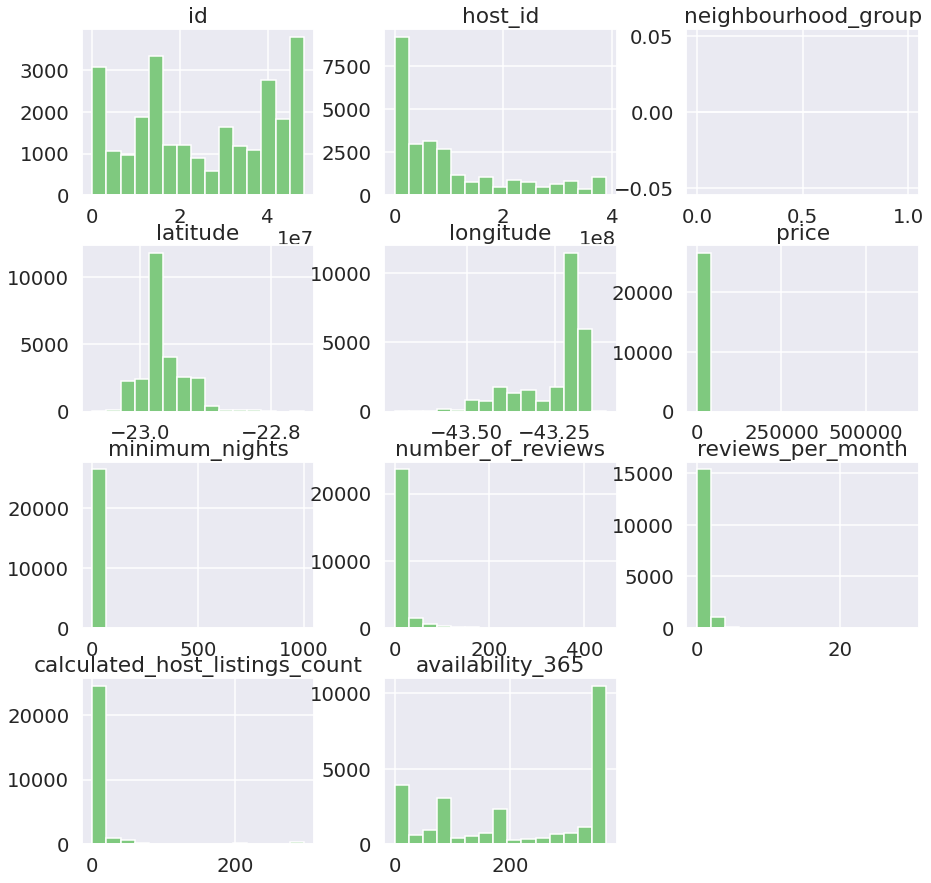

In [101]:
# Contrução dos histogramas das variáveis do dataset.
df.hist(bins=15, figsize=(15,15));

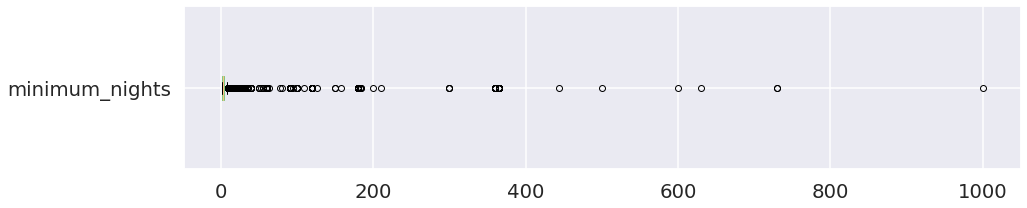

minimum_nights: valores acima de 30:
204 entradas
0.7665%


In [102]:
# Construção do Boxplot para variável minimum_nights.
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificar a quantidade de valores acima de 30 dias para variável minimum_nights.
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

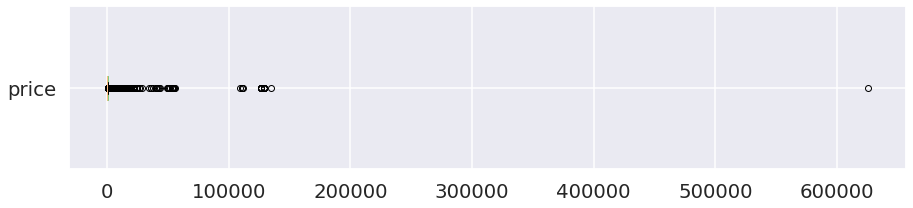


price: valores acima de 1500
1811 entradas
6.8044%


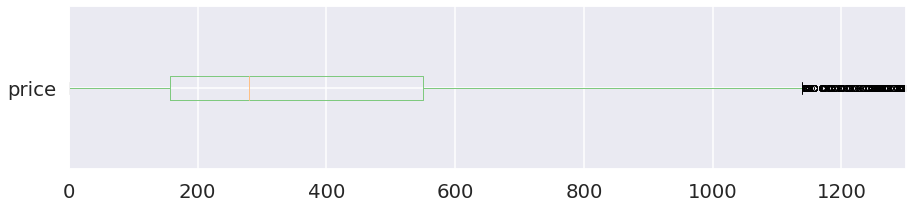

In [103]:
# Construção do Boxplot para variável price.
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Verificar a quantidade de valores acima R$ 1500,00 para variável price.
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

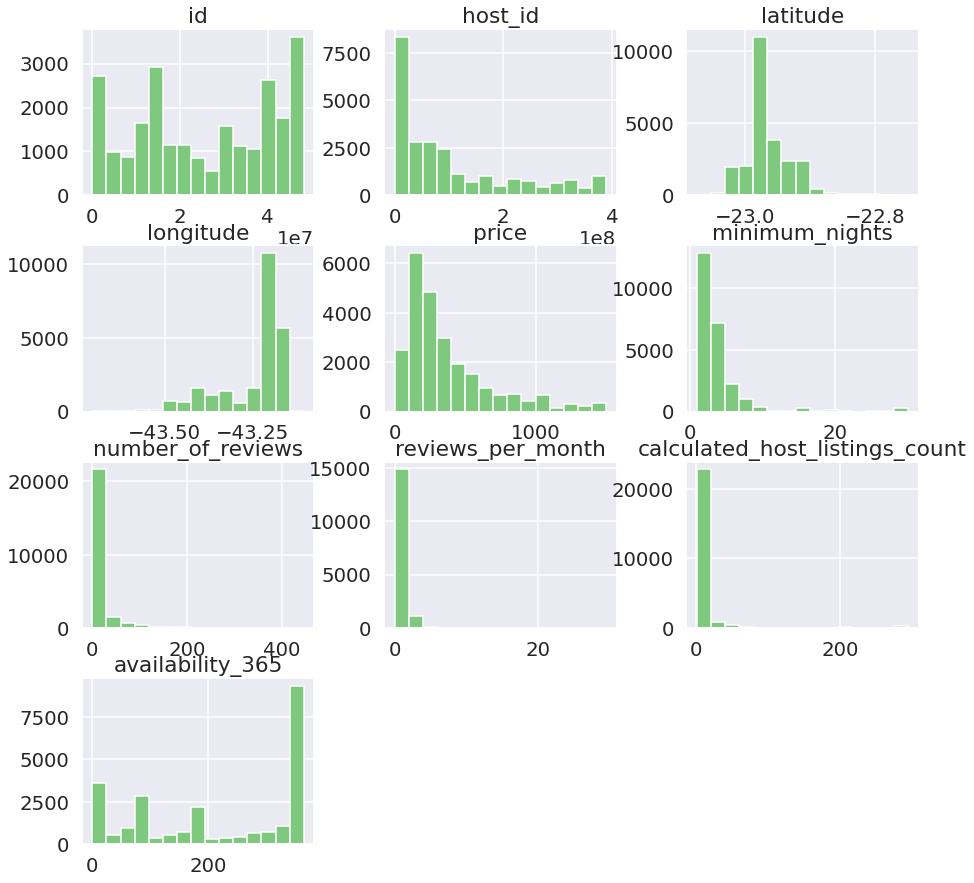

In [104]:
# Foram removidos os outliers para a criação um novo dataset.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Foi removida a variável 'neighbourhood_group', pois está vazia.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Novo histograma para as variáveis numéricas.
df_clean.hist(bins=15, figsize=(15,15));

In [105]:
# Matriz de correlação entre as variáveis numéricas 
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.128833,-0.154570,-0.156886,0.055118,0.080324
minimum_nights,0.128833,1.000000,-0.066031,-0.108980,-0.070371,-0.016255
number_of_reviews,-0.154570,-0.066031,1.000000,0.581592,-0.059649,-0.069988
reviews_per_month,-0.156886,-0.108980,0.581592,1.000000,-0.004081,-0.128388
calculated_host_listings_count,0.055118,-0.070371,-0.059649,-0.004081,1.000000,0.053034
availability_365,0.080324,-0.016255,-0.069988,-0.128388,0.053034,1.000000


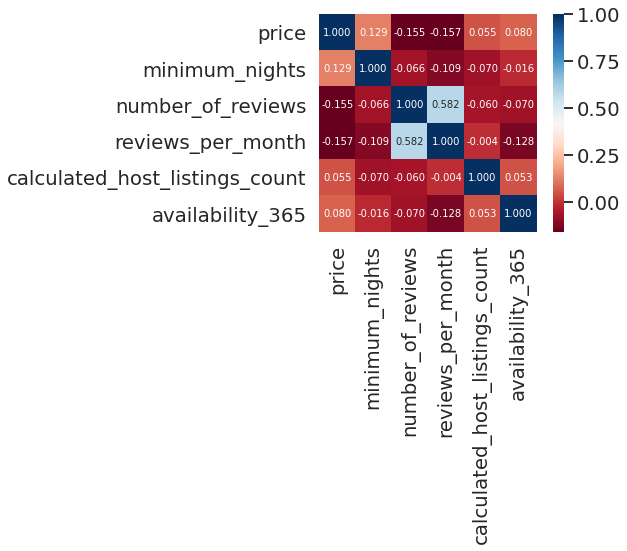

In [106]:
# Mapa de calor (heatmap) a partir da matriz.
sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

In [107]:
# Tabela de frequências da quantidade de imóveis por tipo de imóvel disponível. 
df_clean.room_type.value_counts()

Entire home/apt    17493
Private room        6435
Shared room          595
Hotel room            98
Name: room_type, dtype: int64

In [108]:
# Verificando o percentual de cada tipo de imóvel no total do conjunto de dados.
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.710491
Private room       0.261362
Shared room        0.024166
Hotel room         0.003980
Name: room_type, dtype: float64

In [109]:
# Preço médio por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Vista Alegre          1326.000000
Cavalcanti             925.000000
Vaz Lobo               832.000000
Anchieta               800.000000
Cacuia                 795.000000
Freguesia (Ilha)       754.000000
Osvaldo Cruz           733.333333
Realengo               624.000000
Inhoaíba               547.000000
Grumari                532.666667
Alto da Boa Vista      531.666667
Complexo do Alemão     520.000000
Lagoa                  519.407240
Manguinhos             507.500000
Joá                    504.733333
Name: price, dtype: float64

In [110]:
# Estatisticas descritivas com a retirada dos outliers.
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24621.000000,24621.000000,24621.000000,16123.000000,24621.000000,24621.000000
mean,368.231266,3.448113,12.953373,0.641476,9.470696,216.277040
std,310.735145,4.170215,30.657692,0.884874,36.014586,141.070278
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,87.000000
50%,254.000000,2.000000,2.000000,0.280000,1.000000,237.000000
75%,485.000000,4.000000,10.000000,0.870000,3.000000,363.000000
max,1500.000000,30.000000,446.000000,29.530000,295.000000,365.000000


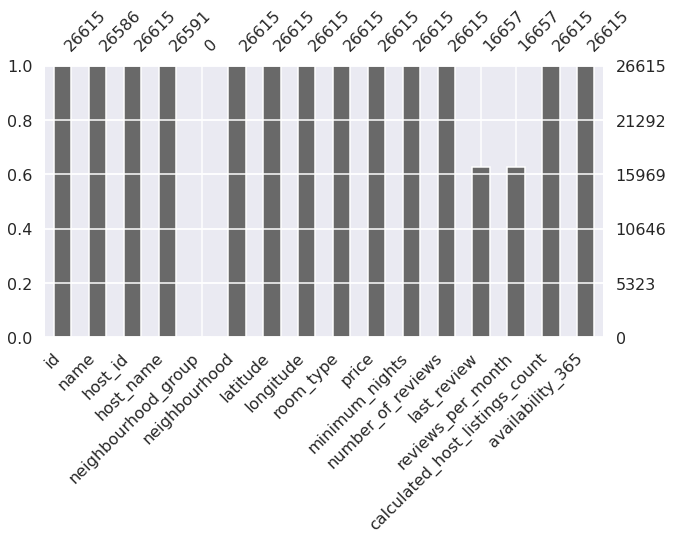

In [111]:
# visualização das entradas de cada coluna para % de missings
msno.bar (df, figsize = (10,5));

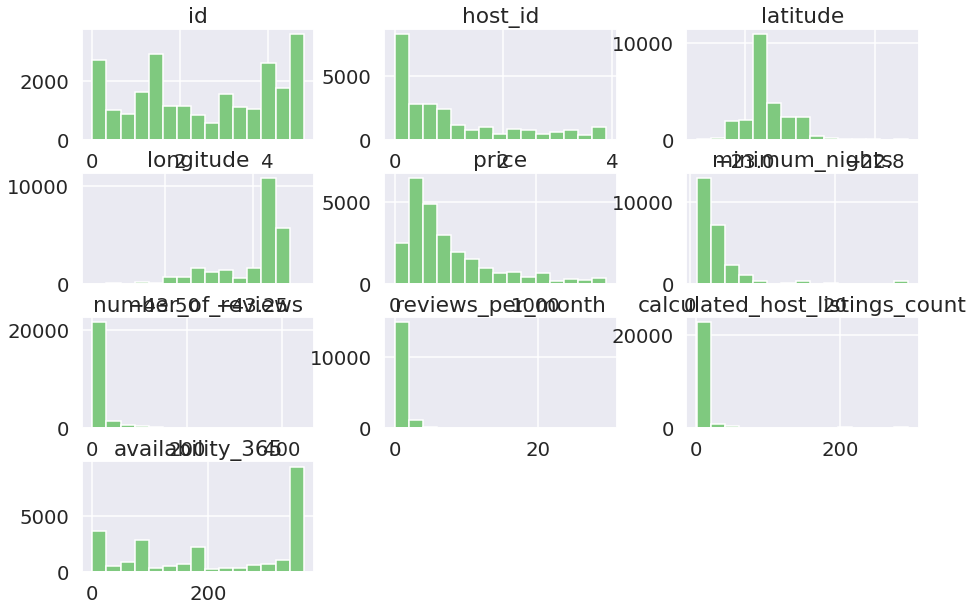

In [112]:
# histogramas com o novo DataSet
df_clean.hist(bins=15, figsize=(15,10));

In [113]:
# visualizando um resumo estatístico das variáveis númericas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24621.00,24621.00,24621.00,16123.00,24621.00,24621.00
mean,368.23,3.45,12.95,0.64,9.47,216.28
std,310.74,4.17,30.66,0.88,36.01,141.07
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,150.00,1.00,0.00,0.09,1.00,87.00
50%,254.00,2.00,2.00,0.28,1.00,237.00
75%,485.00,4.00,10.00,0.87,3.00,363.00
max,1500.00,30.00,446.00,29.53,295.00,365.00


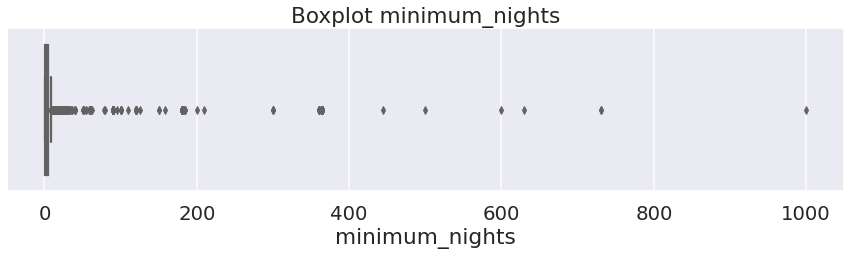

[minimun_nights]
Valores acima de 30:204 entradas
Porcentagem: 0.7665%


In [114]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show() 

# ver quantidade de valores acima de 30 dias para minimum_nights
print(f'[minimun_nights]\nValores acima de 30:{len(df[df.minimum_nights > 30])} entradas')

print('Porcentagem: {:.4f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

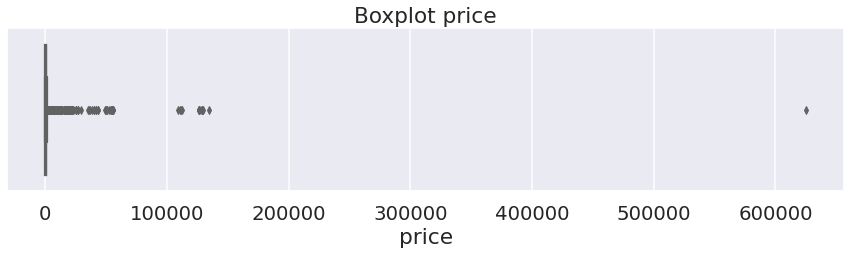

[price]
Valores acima de 1500: 1811 entradas


In [115]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show() 

# ver quantidade de valores acima de 1500 para price
print(f'[price]\nValores acima de 1500: {len(df[df.price > 1500])} entradas')

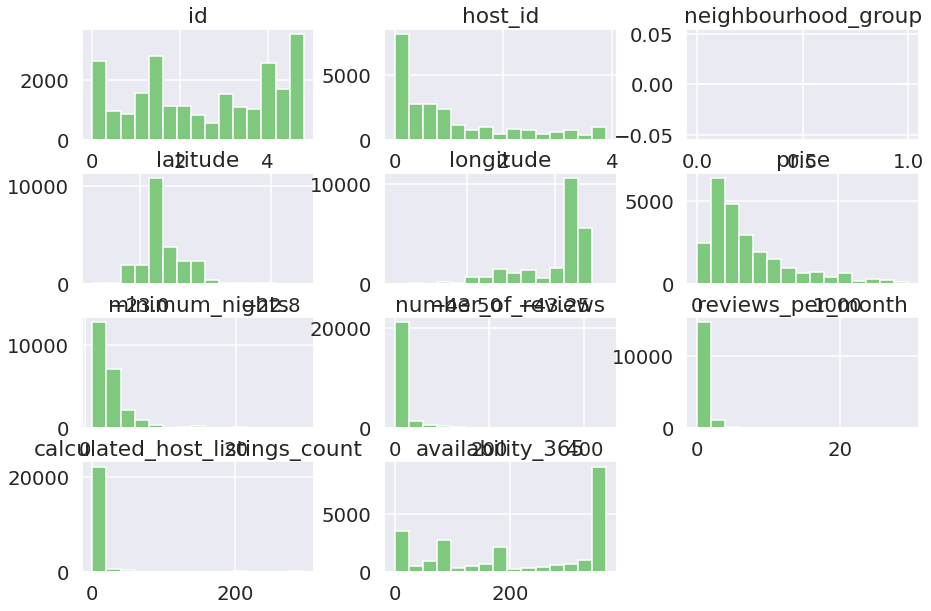

In [116]:
# histogramas com valores de minimum_nights menor que 30 e price menor que 1500
df_clean = df.copy()
df_clean = df_clean.query('minimum_nights < 30 & price < 1500')
df_clean.hist(bins=15, figsize=(15,10));

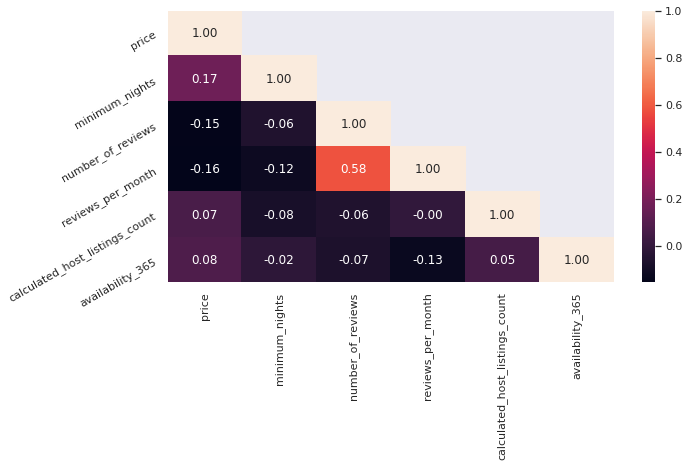

In [117]:
# Correlação entre as variáveis
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']].corr() 

#plotando a matriz de correlação
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))

#criando uma máscara para ver apenas os valores de correlação uma vez
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Foi realizada a limpeza na base de dados, retirando valores extremos e feita uma análise descritiva das variáveis numéricas e frequência das variáveis categóricas. Pela correlação, verificamos que o preço é correlacionado de forma fraca com as variáveis "minimum_nights" (17%) , "reviews_per_month" (-16%) e "number_of_reviews" (-15%)


Modelo de previsão de preços 

In [131]:
# Utilizaremos a variável reviews_per_month para calcular as distâncias
our_acc_value = 3
first_living_space_value = df_clean.loc[0,'reviews_per_month']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

0.9900000000000002


In [132]:
df_clean['distance'] = np.abs(df_clean.reviews_per_month - our_acc_value)
df_clean.distance.value_counts().sort_index()

0.00     34
0.01      4
0.02     10
0.03      7
0.04      5
         ..
4.60      1
5.21      1
5.53      1
5.79      1
26.53     1
Name: distance, Length: 374, dtype: int64

In [133]:
df_clean = df_clean.sample(frac=1,random_state=0)
df_clean = df_clean.sort_values('distance')
df_clean.price.head()

25735     280
25734     133
22925      82
25365     540
25710    1255
Name: price, dtype: int64

In [135]:
mean_price = df_clean.price.mean()
mean_price

356.4897187720683

In [136]:
# Partição dos dados em 2 bases de dados Treinamento e Validação 70% e 30%
df_clean.drop('distance',axis=1)
train_df = df_clean.copy().iloc[:18630]
test_df = df_clean.copy().iloc[18630:]

In [137]:
def predict_price(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(df_clean[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

Agora podemos usar esta função para prever valores para nosso conjunto de dados de teste usando a coluna reviews_per_month.

In [138]:
test_df['predicted_price'] = test_df.reviews_per_month.apply(predict_price,feature_column='reviews_per_month')

In [145]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

341.421770097418

In [150]:
for feature in ['minimum_nights','availability_365','calculated_host_listings_count','reviews_per_month','number_of_reviews']:
    test_df['predicted_price'] = test_df.reviews_per_month.apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the minimum_nights column: 363.71347745667816
RMSE for the availability_365 column: 372.6630247312396
RMSE for the calculated_host_listings_count column: 392.64551718343904
RMSE for the reviews_per_month column: 417.49382492757167
RMSE for the number_of_reviews column: 376.00083886686264


O modelo com melhor erro médio é o modelo com a variável reviews_per_month que possui o menor RMSE

In [151]:
x_values = test_df['predicted_price']
y_values = test_df['price']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.0024783764922547765


O modelo não tem um bom ajuste linear, será necessário fazer um modelo com diversas variáveis independentes em um momento seguinte.